## <font color='blue'>Lending Club Analysis</font>

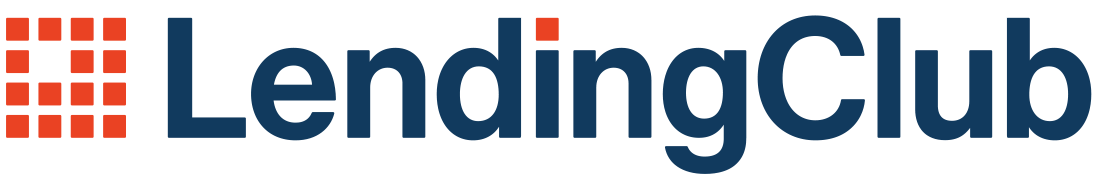

This project was developed in Python language with Numpy library. The focus is not the analysis itself, but a demonstration of what this package can do when it comes to Data Cleaning and Preprocessing

In [1]:
# Packages
import numpy as np
import warnings

# Filter warnings to Ignore Warning
warnings.filterwarnings('ignore')

In [2]:
# NumPy print setup
np.set_printoptions(suppress = True, linewidth = 200, precision = 2)

## Loading the Dataset

https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html

In [3]:
data = np.genfromtxt("datasets/dataset1.csv", 
                      delimiter = ';', 
                      skip_header = 1, 
                      autostrip = True, 
                      encoding = 'cp1252')

In [4]:
type(data)

numpy.ndarray

In [5]:
data.shape

(10000, 14)

In [6]:
data.view()

array([[48010226.  ,         nan,    35000.  , ...,         nan,         nan,     9452.96],
       [57693261.  ,         nan,    30000.  , ...,         nan,         nan,     4679.7 ],
       [59432726.  ,         nan,    15000.  , ...,         nan,         nan,     1969.83],
       ...,
       [50415990.  ,         nan,    10000.  , ...,         nan,         nan,     2185.64],
       [46154151.  ,         nan,         nan, ...,         nan,         nan,     3199.4 ],
       [66055249.  ,         nan,    10000.  , ...,         nan,         nan,      301.9 ]])

## Checking for Missing Values

In [7]:
np.isnan(data).sum()

88005

In [8]:
# Let's return the highest value + 1 ignoring nan values
# We will use this arbitrary value to fill in missing values at variable data load time
# numeric and then treat that value as a missing value
max_1 = np.nanmax(data) + 1
print(max_1)

68616520.0


In [9]:
# Calculate average (numeric variables) ignoring nan values per column
# We will use this to separate numeric variables from string variables
mean_na = np.nanmean(data, axis = 0)
print(mean_na)

[54015809.19         nan    15273.46         nan    15311.04         nan       16.62      440.92         nan         nan         nan         nan         nan     3143.85]


In [10]:
# Columns of type string with missing values
string_columns = np.argwhere(np.isnan(mean_na)).squeeze()
string_columns

array([ 1,  3,  5,  8,  9, 10, 11, 12], dtype=int64)

In [11]:
# Numeric columns
numeric_columns = np.argwhere(np.isnan(mean_na) == False).squeeze()
numeric_columns

array([ 0,  2,  4,  6,  7, 13], dtype=int64)

> We import the dataset again, separating string columns from numeric columns.

In [12]:
# Load columns of type string
arr_strings = np.genfromtxt("datasets/dataset1.csv",
                            delimiter = ';',
                            skip_header = 1,
                            autostrip = True, 
                            usecols = string_columns,
                            dtype = str, 
                            encoding = 'cp1252')

In [13]:
arr_strings

array([['May-15', 'Current', '36 months', ..., 'Verified', 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=48010226', 'CA'],
       ['', 'Current', '36 months', ..., 'Source Verified', 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=57693261', 'NY'],
       ['Sep-15', 'Current', '36 months', ..., 'Verified', 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=59432726', 'PA'],
       ...,
       ['Jun-15', 'Current', '36 months', ..., 'Source Verified', 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=50415990', 'CA'],
       ['Apr-15', 'Current', '36 months', ..., 'Source Verified', 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=46154151', 'OH'],
       ['Dec-15', 'Current', '36 months', ..., '', 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=66055249', 'IL']], dtype='<U69')

In [14]:
# Load columns of numeric type filling in the missing values
arr_numeric = np.genfromtxt("datasets/dataset1.csv",
                            delimiter = ';',
                            autostrip = True,
                            skip_header = 1,
                            usecols = numeric_columns,
                            filling_values = max_1, 
                            encoding = 'cp1252')

In [15]:
arr_numeric

array([[48010226.  ,    35000.  ,    35000.  ,       13.33,     1184.86,     9452.96],
       [57693261.  ,    30000.  ,    30000.  , 68616520.  ,      938.57,     4679.7 ],
       [59432726.  ,    15000.  ,    15000.  , 68616520.  ,      494.86,     1969.83],
       ...,
       [50415990.  ,    10000.  ,    10000.  , 68616520.  , 68616520.  ,     2185.64],
       [46154151.  , 68616520.  ,    10000.  ,       16.55,      354.3 ,     3199.4 ],
       [66055249.  ,    10000.  ,    10000.  , 68616520.  ,      309.97,      301.9 ]])

> Now we extract the column names.

In [16]:
# Load column names
arr_column_names = np.genfromtxt("datasets/dataset1.csv",
                                  delimiter = ';',
                                  autostrip = True,
                                  skip_footer = data.shape[0],
                                  dtype = str, 
                                  encoding = 'cp1252')

In [17]:
arr_column_names

array(['id', 'issue_d', 'loan_amnt', 'loan_status', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'verification_status', 'url', 'addr_state', 'total_pymnt'], dtype='<U19')

In [18]:
# Separate headers from numeric and string columns
header_strings, header_numeric = arr_column_names[string_columns], arr_column_names[numeric_columns]

In [19]:
header_strings

array(['issue_d', 'loan_status', 'term', 'grade', 'sub_grade', 'verification_status', 'url', 'addr_state'], dtype='<U19')

In [20]:
header_numeric

array(['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'total_pymnt'], dtype='<U19')

## Checkpoint function

**Checkpoint 1**

Let's create a checkpoint function to save intermediate results.

In [21]:
# Checkpoint function
def checkpoint(file_name, checkpoint_header, checkpoint_data):
    np.savez(file_name, header = checkpoint_header, data = checkpoint_data)
    checkpoint_variable = np.load(file_name + ".npz")
    return(checkpoint_variable)

In [22]:
first_checkpoin = checkpoint("datasets/first-checkpoint", header_strings, arr_strings)

In [23]:
first_checkpoin['data']

array([['May-15', 'Current', '36 months', ..., 'Verified', 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=48010226', 'CA'],
       ['', 'Current', '36 months', ..., 'Source Verified', 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=57693261', 'NY'],
       ['Sep-15', 'Current', '36 months', ..., 'Verified', 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=59432726', 'PA'],
       ...,
       ['Jun-15', 'Current', '36 months', ..., 'Source Verified', 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=50415990', 'CA'],
       ['Apr-15', 'Current', '36 months', ..., 'Source Verified', 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=46154151', 'OH'],
       ['Dec-15', 'Current', '36 months', ..., '', 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=66055249', 'IL']], dtype='<U69')

In [24]:
np.array_equal(first_checkpoin['data'], arr_strings)

True

## Manipulating String Columns

In [25]:
header_strings

array(['issue_d', 'loan_status', 'term', 'grade', 'sub_grade', 'verification_status', 'url', 'addr_state'], dtype='<U19')

In [26]:
# Let's adjust the issue_d column name to make the column easier to identify
header_strings[0] = "issue_date"

In [27]:
header_strings

array(['issue_date', 'loan_status', 'term', 'grade', 'sub_grade', 'verification_status', 'url', 'addr_state'], dtype='<U19')

In [28]:
arr_strings

array([['May-15', 'Current', '36 months', ..., 'Verified', 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=48010226', 'CA'],
       ['', 'Current', '36 months', ..., 'Source Verified', 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=57693261', 'NY'],
       ['Sep-15', 'Current', '36 months', ..., 'Verified', 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=59432726', 'PA'],
       ...,
       ['Jun-15', 'Current', '36 months', ..., 'Source Verified', 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=50415990', 'CA'],
       ['Apr-15', 'Current', '36 months', ..., 'Source Verified', 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=46154151', 'OH'],
       ['Dec-15', 'Current', '36 months', ..., '', 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=66055249', 'IL']], dtype='<U69')

### Preprocessing the issue_date Variable with Label Encoding

In [29]:
# Extract the unique values of the variable
np.unique(arr_strings[:,0])

array(['', 'Apr-15', 'Aug-15', 'Dec-15', 'Feb-15', 'Jan-15', 'Jul-15', 'Jun-15', 'Mar-15', 'May-15', 'Nov-15', 'Oct-15', 'Sep-15'], dtype='<U69')

In [30]:
# Let's remove the -15 suffix and convert to an array of strings
arr_strings[:,0] = np.chararray.strip(arr_strings[:,0], "-15")

In [31]:
# Extrai os valores únicos da variável
np.unique(arr_strings[:,0])

array(['', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'], dtype='<U69')

In [32]:
# We create an array with the months (including an element as empty for whatever is blank)
arr_months = np.array(['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

In [33]:
# Loop to convert month names to numerical values
# We call this label encoding
for i in range(13):
    arr_strings[:,0] = np.where(arr_strings[:,0] == arr_months[i], i, arr_strings[:,0])

In [34]:
np.unique(arr_strings[:,0])

array(['0', '1', '10', '11', '12', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U69')

### Pre-Processing of the variable loan_status with Binarization

In [35]:
header_strings

array(['issue_date', 'loan_status', 'term', 'grade', 'sub_grade', 'verification_status', 'url', 'addr_state'], dtype='<U19')

In [36]:
# Extract the unique values of the variable
np.unique(arr_strings[:,1])

array(['', 'Charged Off', 'Current', 'Default', 'Fully Paid', 'In Grace Period', 'Issued', 'Late (16-30 days)', 'Late (31-120 days)'], dtype='<U69')

In [37]:
# Número de elementos
np.unique(arr_strings[:,1]).size

9

In [38]:
# Criamos um array com apenas 3 status
status_bad = np.array(['', 'Charged Off', 'Default', 'Late (31-120 days)'])

In [39]:
# We now check the values of the variable and compare it with the previous array converting the variable to binary values
# We call this binarization
## Grouped into 2 categories. good or bad category
arr_strings[:,1] = np.where(np.isin(arr_strings[:,1], status_bad),0,1)

In [40]:
np.unique(arr_strings[:,1])

array(['0', '1'], dtype='<U69')

### Pre-Processing the term Variable with String Cleanup

In [41]:
header_strings

array(['issue_date', 'loan_status', 'term', 'grade', 'sub_grade', 'verification_status', 'url', 'addr_state'], dtype='<U19')

In [42]:
# Extract the unique values of the variable
np.unique(arr_strings[:,2])

array(['', '36 months', '60 months'], dtype='<U69')

In [43]:
# Removed the word months (note the space before the word)
arr_strings[:,2] = np.chararray.strip(arr_strings[:,2], " months")
arr_strings[:,2]

array(['36', '36', '36', ..., '36', '36', '36'], dtype='<U69')

In [44]:
# Change the title of the variable
header_strings[2] = "term_months"

In [45]:
# We replace the missing values with the largest value, in our case 60
arr_strings[:,2] = np.where(arr_strings[:,2] == '', '60', arr_strings[:,2])

In [46]:
arr_strings[:,2]

array(['36', '36', '36', ..., '36', '36', '36'], dtype='<U69')

In [47]:
# Extract the unique values of the variable
np.unique(arr_strings[:,2])

array(['36', '60'], dtype='<U69')

### Pre-Processing Grade and sub_grade Variables with Dictionary (Like Label Encoding)

In [48]:
header_strings

array(['issue_date', 'loan_status', 'term_months', 'grade', 'sub_grade', 'verification_status', 'url', 'addr_state'], dtype='<U19')

In [49]:
# Extract the unique values of the variable
np.unique(arr_strings[:,3])

array(['', 'A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype='<U69')

In [50]:
# Extrai os valores únicos da variável
np.unique(arr_strings[:,4])

array(['', 'A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1',
       'G2', 'G3', 'G4', 'G5'], dtype='<U69')

Let's adjust the sub_grade variable.

In [51]:
np.unique(arr_strings[:,3])[1:]

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype='<U69')

In [52]:
# Loop for adjusting sub_grade variable
for i in np.unique(arr_strings[:,3])[1:]:
    arr_strings[:,4] = np.where(
        (arr_strings[:,4] == '') & (arr_strings[:,3] == i), 
        i + '5', 
        arr_strings[:,4])

In [53]:
# Return categories and their respective counts
np.unique(arr_strings[:,4], return_counts = True)

(array(['', 'A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1',
        'G2', 'G3', 'G4', 'G5'], dtype='<U69'),
 array([  9, 285, 278, 239, 323, 592, 509, 517, 530, 553, 633, 629, 567, 586, 564, 577, 391, 267, 250, 255, 288, 235, 162, 171, 139, 160,  94,  52,  34,  43,  24,  19,  10,   3,   7,   5], dtype=int64))

In [54]:
np.unique(arr_strings[:,4])

array(['', 'A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1',
       'G2', 'G3', 'G4', 'G5'], dtype='<U69')

In [55]:
# We replace missing values with a new category
arr_strings[:,4] = np.where(arr_strings[:,4] == '', 'H1', arr_strings[:,4])

In [56]:
# Extract the unique values of the variable
np.unique(arr_strings[:,4])

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2',
       'G3', 'G4', 'G5', 'H1'], dtype='<U69')

Let's remove the grade variable.

In [57]:
# We don't need the grade variable anymore. We can remove it.
arr_strings = np.delete(arr_strings, 3, axis = 1)

In [58]:
# New variable in index column 3
arr_strings[:,3]

array(['C3', 'A5', 'B5', ..., 'A5', 'D2', 'A4'], dtype='<U69')

In [59]:
# We can't forget to remove the column from the array of column names
header_strings = np.delete(header_strings, 3)

In [60]:
# New variable in index column 3
header_strings[3]

'sub_grade'

Finally, we convert the sub_grade variable to its numerical representation.

In [61]:
# Extract the unique values of the variable
np.unique(arr_strings[:,3])

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2',
       'G3', 'G4', 'G5', 'H1'], dtype='<U69')

In [62]:
# Create a list of keys
keys = list(np.unique(arr_strings[:,3]))     
keys[0]

'A1'

In [63]:
# Create a list of values
values = list(range(1, np.unique(arr_strings[:,3]).shape[0] + 1)) 
values[0]

1

In [64]:
# We then create the dictionary
dict_sub_grade = dict(zip(keys, values))

In [65]:
dict_sub_grade

{'A1': 1,
 'A2': 2,
 'A3': 3,
 'A4': 4,
 'A5': 5,
 'B1': 6,
 'B2': 7,
 'B3': 8,
 'B4': 9,
 'B5': 10,
 'C1': 11,
 'C2': 12,
 'C3': 13,
 'C4': 14,
 'C5': 15,
 'D1': 16,
 'D2': 17,
 'D3': 18,
 'D4': 19,
 'D5': 20,
 'E1': 21,
 'E2': 22,
 'E3': 23,
 'E4': 24,
 'E5': 25,
 'F1': 26,
 'F2': 27,
 'F3': 28,
 'F4': 29,
 'F5': 30,
 'G1': 31,
 'G2': 32,
 'G3': 33,
 'G4': 34,
 'G5': 35,
 'H1': 36}

In [66]:
# Loop to replace the string with the categories with the numerical representation (frequency)

for i in np.unique(arr_strings[:,3]):
        arr_strings[:,3] = np.where(arr_strings[:,3] == i, dict_sub_grade[i], arr_strings[:,3])

In [67]:
# Extract the unique values of the variable
np.unique(arr_strings[:,3])

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '4', '5', '6',
       '7', '8', '9'], dtype='<U69')

### Pre-Processing the Verification Status Variable with Binarization

In [68]:
# List of variable names
header_strings

array(['issue_date', 'loan_status', 'term_months', 'sub_grade', 'verification_status', 'url', 'addr_state'], dtype='<U19')

In [69]:
# Extract the unique values of the variable
np.unique(arr_strings[:,4])

array(['', 'Not Verified', 'Source Verified', 'Verified'], dtype='<U69')

In [70]:
# We use binarization on this variable
arr_strings[:,4] = np.where((arr_strings[:,4] == '') | (arr_strings[:,4] == 'Not Verified'), 0, 1)

In [71]:
# Extrai os valores únicos da variável
np.unique(arr_strings[:,4])

array(['0', '1'], dtype='<U69')

### Pre-Processing the url Variable with ID Extraction

In [72]:
# View sample data
arr_strings[:,5]

array(['https://www.lendingclub.com/browse/loanDetail.action?loan_id=48010226', 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=57693261',
       'https://www.lendingclub.com/browse/loanDetail.action?loan_id=59432726', ..., 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=50415990',
       'https://www.lendingclub.com/browse/loanDetail.action?loan_id=46154151', 'https://www.lendingclub.com/browse/loanDetail.action?loan_id=66055249'], dtype='<U69')

In [73]:
# We extract the id from the end of each url
np.chararray.strip(arr_strings[:,5], "https://www.lendingclub.com/browse/loanDetail.action?loan_id=")

chararray(['48010226', '57693261', '59432726', ..., '50415990', '46154151', '66055249'], dtype='<U69')

In [74]:
# Replace the url with the id value in the url
arr_strings[:,5] = np.chararray.strip(arr_strings[:,5], 
                                      "https://www.lendingclub.com/browse/loanDetail.action?loan_id=")

In [75]:
# Convert the type to int32
arr_strings[:,5].astype(dtype = np.int32)

array([48010226, 57693261, 59432726, ..., 50415990, 46154151, 66055249])

In [76]:
# Looks like this id is present in the first column of the dataset.
# Let's convert to int 32 and compare
arr_numeric[:,0].astype(dtype = np.int32)

array([48010226, 57693261, 59432726, ..., 50415990, 46154151, 66055249])

In [77]:
## Let's compare if one is equal to another
np.array_equal(
    arr_numeric[:,0].astype(dtype = np.int32), 
    arr_strings[:,5].astype(dtype = np.int32)
)

True

Yes, it's the same information. So let's remove one of the columns.

In [78]:
# Remove from data array
arr_strings = np.delete(arr_strings, 5, axis = 1)

In [79]:
# Remove from column name array
header_strings = np.delete(header_strings, 5)

In [80]:
# New column at index 5
arr_strings[:,5]

array(['CA', 'NY', 'PA', ..., 'CA', 'OH', 'IL'], dtype='<U69')

In [81]:
# New column list
header_strings

array(['issue_date', 'loan_status', 'term_months', 'sub_grade', 'verification_status', 'addr_state'], dtype='<U19')

In [82]:
# Coluna id
arr_numeric[:,0]

array([48010226., 57693261., 59432726., ..., 50415990., 46154151., 66055249.])

In [83]:
# Column id is now part of array of numerics
header_numeric

array(['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'total_pymnt'], dtype='<U19')

### Pre-Processing of the Address Variable with Categorization

In [84]:
header_strings

array(['issue_date', 'loan_status', 'term_months', 'sub_grade', 'verification_status', 'addr_state'], dtype='<U19')

In [85]:
# Let's adjust the column name
header_strings[5] = "state_address"

In [86]:
# Extract names and counts
states_names, states_count = np.unique(arr_strings[:,5], return_counts = True)

In [87]:
# Sort in descending order
states_count_sorted = np.argsort(-states_count)

In [88]:
# print the result
states_names[states_count_sorted], states_count[states_count_sorted]

(array(['CA', 'NY', 'TX', 'FL', '', 'IL', 'NJ', 'GA', 'PA', 'OH', 'MI', 'NC', 'VA', 'MD', 'AZ', 'WA', 'MA', 'CO', 'MO', 'MN', 'IN', 'WI', 'CT', 'TN', 'NV', 'AL', 'LA', 'OR', 'SC', 'KY', 'KS', 'OK',
        'UT', 'AR', 'MS', 'NH', 'NM', 'WV', 'HI', 'RI', 'MT', 'DE', 'DC', 'WY', 'AK', 'NE', 'SD', 'VT', 'ND', 'ME'], dtype='<U69'),
 array([1336,  777,  758,  690,  500,  389,  341,  321,  320,  312,  267,  261,  242,  222,  220,  216,  210,  201,  160,  156,  152,  148,  143,  143,  130,  119,  116,  108,  107,   84,   84,   83,
          74,   74,   61,   58,   57,   49,   44,   40,   28,   27,   27,   27,   26,   25,   24,   17,   16,   10], dtype=int64))

In [89]:
# Replace missing values with zero
arr_strings[:,5] = np.where(arr_strings[:,5] == '', 0, arr_strings[:,5])

Let's separate the states by regions. Reference:
https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf

In [90]:
# Separate states by regions
states_west = np.array(['WA', 'OR','CA','NV','ID','MT', 'WY','UT','CO', 'AZ','NM','HI','AK'])
states_south = np.array(['TX','OK','AR','LA','MS','AL','TN','KY','FL','GA','SC','NC','VA','WV','MD','DE','DC'])
states_midwest = np.array(['ND','SD','NE','KS','MN','IA','MO','WI','IL','IN','MI','OH'])
states_east = np.array(['PA','NY','NJ','CT','MA','VT','NH','ME','RI'])

In [91]:
# Now we replace each state with its region id
arr_strings[:,5] = np.where(
    np.isin(arr_strings[:,5], 
            states_west), 
    1, 
    arr_strings[:,5])

arr_strings[:,5] = np.where(np.isin(arr_strings[:,5], states_south), 2, arr_strings[:,5])

arr_strings[:,5] = np.where(np.isin(arr_strings[:,5], states_midwest), 3, arr_strings[:,5])

arr_strings[:,5] = np.where(np.isin(arr_strings[:,5], states_east), 4, arr_strings[:,5])

In [92]:
# Extract the unique values
np.unique(arr_strings[:,5])

array(['0', '1', '2', '3', '4'], dtype='<U69')

## Converting the array

Our array of strings is now a numeric array. Let's adjust the data type.

In [93]:
arr_strings

array([['5', '1', '36', '13', '1', '1'],
       ['0', '1', '36', '5', '1', '4'],
       ['9', '1', '36', '10', '1', '4'],
       ...,
       ['6', '1', '36', '5', '1', '1'],
       ['4', '1', '36', '17', '1', '3'],
       ['12', '1', '36', '4', '0', '3']], dtype='<U69')

In [94]:
arr_strings = arr_strings.astype(int)


In [95]:
arr_strings

array([[ 5,  1, 36, 13,  1,  1],
       [ 0,  1, 36,  5,  1,  4],
       [ 9,  1, 36, 10,  1,  4],
       ...,
       [ 6,  1, 36,  5,  1,  1],
       [ 4,  1, 36, 17,  1,  3],
       [12,  1, 36,  4,  0,  3]])

In [96]:
arr_strings.dtype

dtype('int32')

## Checkpoint with String Type Variables, Clean and Pre-Processed

**Checkpoint 2**

After completing the first part, let's record the checkpoint.

In [97]:
checkpoint_strings = checkpoint("datasets/Checkpoint-Strings", header_strings, arr_strings)

In [98]:
checkpoint_strings["header"]

array(['issue_date', 'loan_status', 'term_months', 'sub_grade', 'verification_status', 'state_address'], dtype='<U19')

In [99]:
checkpoint_strings["data"]

array([[ 5,  1, 36, 13,  1,  1],
       [ 0,  1, 36,  5,  1,  4],
       [ 9,  1, 36, 10,  1,  4],
       ...,
       [ 6,  1, 36,  5,  1,  1],
       [ 4,  1, 36, 17,  1,  3],
       [12,  1, 36,  4,  0,  3]])

In [100]:
np.array_equal(checkpoint_strings['data'], arr_strings)

True

## Manipulating Numeric Columns

In [101]:
# Visualize the data
arr_numeric

array([[48010226.  ,    35000.  ,    35000.  ,       13.33,     1184.86,     9452.96],
       [57693261.  ,    30000.  ,    30000.  , 68616520.  ,      938.57,     4679.7 ],
       [59432726.  ,    15000.  ,    15000.  , 68616520.  ,      494.86,     1969.83],
       ...,
       [50415990.  ,    10000.  ,    10000.  , 68616520.  , 68616520.  ,     2185.64],
       [46154151.  , 68616520.  ,    10000.  ,       16.55,      354.3 ,     3199.4 ],
       [66055249.  ,    10000.  ,    10000.  , 68616520.  ,      309.97,      301.9 ]])

In [102]:
# Column names
header_numeric

array(['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'total_pymnt'], dtype='<U19')

In [103]:
# We have no missing value, because when loading the data we replace it with an arbitrary value
np.isnan(arr_numeric).sum()

0

In [104]:
max_1

68616520.0

In [105]:
# We can check if a column has been filled with the max_1 value
np.isin(arr_numeric[:,0], max_1).sum()

0

Let's create an array of statistics, specifically the minimum, maximum and average value of each variable. We will use this in handling missing values (filled with the max_1 value).

In [106]:
# We create an array with min, average and max value ignoring nan
# We will use this in handling missing values
arr_stats = np.array([
    np.nanmin(data, axis = 0), 
     mean_na, 
     np.nanmax(data, axis = 0)
])
print(arr_stats)

[[  373332.           nan     1000.           nan     1000.           nan        6.         31.42         nan         nan         nan         nan         nan        0.  ]
 [54015809.19         nan    15273.46         nan    15311.04         nan       16.62      440.92         nan         nan         nan         nan         nan     3143.85]
 [68616519.           nan    35000.           nan    35000.           nan       28.99     1372.97         nan         nan         nan         nan         nan    41913.62]]


In [107]:
arr_stats[:, numeric_columns]

array([[  373332.  ,     1000.  ,     1000.  ,        6.  ,       31.42,        0.  ],
       [54015809.19,    15273.46,    15311.04,       16.62,      440.92,     3143.85],
       [68616519.  ,    35000.  ,    35000.  ,       28.99,     1372.97,    41913.62]])

### Pre-Processing of the funded_amnt Variable

In [108]:
# Visualize the data
arr_numeric[:,2]

array([35000., 30000., 15000., ..., 10000., 10000., 10000.])

In [109]:
arr_stats[0, numeric_columns[2]]

1000.0

In [110]:
# Adjust the column content
arr_numeric[:,2] = np.where(
    arr_numeric[:,2] == max_1, 
    arr_stats[0, numeric_columns[2]], 
    arr_numeric[:,2])

In [111]:
arr_numeric[:,2]

array([35000., 30000., 15000., ..., 10000., 10000., 10000.])

### Pre-Processing of Loan_amnt, int_rate, installment and total_pymnt Variables

In [112]:
# Column names
header_numeric

array(['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'total_pymnt'], dtype='<U19')

In [113]:
# Loop to replace the missing value (max_1) with the statistics array values
for i in [1,3,4,5]:
    arr_numeric[:,i] = np.where(
        arr_numeric[:,i] == max_1, 
        arr_stats[2, numeric_columns[i]], 
        arr_numeric[:,i])

In [114]:
arr_numeric

array([[48010226.  ,    35000.  ,    35000.  ,       13.33,     1184.86,     9452.96],
       [57693261.  ,    30000.  ,    30000.  ,       28.99,      938.57,     4679.7 ],
       [59432726.  ,    15000.  ,    15000.  ,       28.99,      494.86,     1969.83],
       ...,
       [50415990.  ,    10000.  ,    10000.  ,       28.99,     1372.97,     2185.64],
       [46154151.  ,    35000.  ,    10000.  ,       16.55,      354.3 ,     3199.4 ],
       [66055249.  ,    10000.  ,    10000.  ,       28.99,      309.97,      301.9 ]])

### Working with the Second Dataset

Let's load the USD - EURO quote data. Each row in the dataset corresponds to the exchange rate for one month in a year.

In [115]:
# Load the second dataset
data_cot = np.genfromtxt("datasets/dataset2.csv", 
                          delimiter = ',', 
                          autostrip = True, 
                          skip_header = 1, 
                          usecols = 3)

In [116]:
data_cot

array([1.13, 1.12, 1.08, 1.11, 1.1 , 1.12, 1.09, 1.13, 1.13, 1.1 , 1.06, 1.09])

In [117]:
header_strings

array(['issue_date', 'loan_status', 'term_months', 'sub_grade', 'verification_status', 'state_address'], dtype='<U19')

In [118]:
arr_strings

array([[ 5,  1, 36, 13,  1,  1],
       [ 0,  1, 36,  5,  1,  4],
       [ 9,  1, 36, 10,  1,  4],
       ...,
       [ 6,  1, 36,  5,  1,  1],
       [ 4,  1, 36, 17,  1,  3],
       [12,  1, 36,  4,  0,  3]])

In [119]:
# Column 0 of the string array is the month
arr_strings[:,0]

array([ 5,  0,  9, ...,  6,  4, 12])

In [120]:
# Let's assign the month column to the variable called exchange_rate
exchange_rate = arr_strings[:,0]

In [121]:
exchange_rate

array([ 5,  0,  9, ...,  6,  4, 12])

In [122]:
# Loop to fill the exchange_rate variable with the rate corresponding to the month
# We use data_cot[i - 1] due to the way we load months to handle zero
## D- for month and currency
for i in range(1,13):
    exchange_rate = np.where(
        exchange_rate == i, 
        data_cot[i - 1], 
        exchange_rate)    

In [123]:
exchange_rate

array([1.1 , 0.  , 1.13, ..., 1.12, 1.11, 1.09])

In [124]:
# Where the exchange rate is zero we replace it with the average
exchange_rate = np.where(
    exchange_rate == 0, 
    np.mean(data_cot), 
    exchange_rate)

In [125]:
exchange_rate

array([1.1 , 1.11, 1.13, ..., 1.12, 1.11, 1.09])

In [126]:
exchange_rate.shape

(10000,)

In [127]:
arr_numeric.shape

(10000, 6)

In [128]:
exchange_rate = np.reshape(
    exchange_rate, 
    (10000,1))

In [129]:
# Concatenation of arrays
arr_numeric = np.hstack(
    (arr_numeric, exchange_rate)
)

In [130]:
# Include the column name in the array of column names
header_numeric = np.concatenate(
    (header_numeric, 
     np.array(['exchange_rate'])
    )
)

In [131]:
header_numeric

array(['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'total_pymnt', 'exchange_rate'], dtype='<U19')

Include the column name in the array of column names

In [132]:
header_numeric

array(['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'total_pymnt', 'exchange_rate'], dtype='<U19')

In [133]:
# Columns in USD
columns_dollar = np.array([1,2,4,5])

In [134]:
arr_numeric[:,6]

array([1.1 , 1.11, 1.13, ..., 1.12, 1.11, 1.09])

In [135]:
# Shape
arr_numeric.shape

(10000, 7)

In [136]:
# Loop through the USD columns to apply the conversion rate to EURO
for i in columns_dollar:
    arr_numeric = np.hstack(
        (arr_numeric, 
         np.reshape(arr_numeric[:,i] 
                    / 
                    arr_numeric[:,6], 
                    (10000,1)
                   )
        )
    )

In [137]:
# Shape
arr_numeric.shape

(10000, 11)

In [138]:
# Visualiza
arr_numeric

array([[48010226.  ,    35000.  ,    35000.  , ...,    31933.3 ,     1081.04,     8624.69],
       [57693261.  ,    30000.  ,    30000.  , ...,    27132.46,      848.86,     4232.39],
       [59432726.  ,    15000.  ,    15000.  , ...,    13326.3 ,      439.64,     1750.04],
       ...,
       [50415990.  ,    10000.  ,    10000.  , ...,     8910.3 ,     1223.36,     1947.47],
       [46154151.  ,    35000.  ,    10000.  , ...,     8997.4 ,      318.78,     2878.63],
       [66055249.  ,    10000.  ,    10000.  , ...,     9145.8 ,      283.49,      276.11]])

Let's expand the header with the new columns.

In [139]:
header_additional = np.array(
    [column_name + '_EUR' 
     for column_name 
     in header_numeric[columns_dollar]
    ]
)

In [140]:
header_additional

array(['loan_amnt_EUR', 'funded_amnt_EUR', 'installment_EUR', 'total_pymnt_EUR'], dtype='<U15')

In [141]:
header_numeric = np.concatenate(
    (header_numeric, header_additional)
)

In [142]:
header_numeric

array(['id', 'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'total_pymnt', 'exchange_rate', 'loan_amnt_EUR', 'funded_amnt_EUR', 'installment_EUR', 'total_pymnt_EUR'], dtype='<U19')

In [143]:
header_numeric[columns_dollar] = np.array(
    [column_name + '_USD' 
     for column_name 
     in header_numeric[columns_dollar]])

In [144]:
header_numeric

array(['id', 'loan_amnt_USD', 'funded_amnt_USD', 'int_rate', 'installment_USD', 'total_pymnt_USD', 'exchange_rate', 'loan_amnt_EUR', 'funded_amnt_EUR', 'installment_EUR', 'total_pymnt_EUR'],
      dtype='<U19')

In [145]:
columns_index_order = [0,1,7,2,8,3,4,9,5,10,6]

In [146]:
header_numeric = header_numeric[columns_index_order]

In [147]:
arr_numeric

array([[48010226.  ,    35000.  ,    35000.  , ...,    31933.3 ,     1081.04,     8624.69],
       [57693261.  ,    30000.  ,    30000.  , ...,    27132.46,      848.86,     4232.39],
       [59432726.  ,    15000.  ,    15000.  , ...,    13326.3 ,      439.64,     1750.04],
       ...,
       [50415990.  ,    10000.  ,    10000.  , ...,     8910.3 ,     1223.36,     1947.47],
       [46154151.  ,    35000.  ,    10000.  , ...,     8997.4 ,      318.78,     2878.63],
       [66055249.  ,    10000.  ,    10000.  , ...,     9145.8 ,      283.49,      276.11]])

In [148]:
arr_numeric = arr_numeric[:,columns_index_order]

### Pre-Processing the Variable int_rate

In [149]:
header_numeric

array(['id', 'loan_amnt_USD', 'loan_amnt_EUR', 'funded_amnt_USD', 'funded_amnt_EUR', 'int_rate', 'installment_USD', 'installment_EUR', 'total_pymnt_USD', 'total_pymnt_EUR', 'exchange_rate'],
      dtype='<U19')

In [150]:
arr_numeric[:,5]

array([13.33, 28.99, 28.99, ..., 28.99, 16.55, 28.99])

In [151]:
# Let's just divide by 100
arr_numeric[:,5] = arr_numeric[:,5] / 100

In [152]:
arr_numeric[:,5]

array([0.13, 0.29, 0.29, ..., 0.29, 0.17, 0.29])

## Checkpoint with Clean and Preprocessed Numerical Variables

**Checkpoint 3**

In [153]:
checkpoint_numeric = checkpoint("datasets/Checkpoint-Numeric", header_numeric, arr_numeric)

In [154]:
checkpoint_numeric['header'], checkpoint_numeric['data']

(array(['id', 'loan_amnt_USD', 'loan_amnt_EUR', 'funded_amnt_USD', 'funded_amnt_EUR', 'int_rate', 'installment_USD', 'installment_EUR', 'total_pymnt_USD', 'total_pymnt_EUR', 'exchange_rate'],
       dtype='<U19'),
 array([[48010226.  ,    35000.  ,    31933.3 , ...,     9452.96,     8624.69,        1.1 ],
        [57693261.  ,    30000.  ,    27132.46, ...,     4679.7 ,     4232.39,        1.11],
        [59432726.  ,    15000.  ,    13326.3 , ...,     1969.83,     1750.04,        1.13],
        ...,
        [50415990.  ,    10000.  ,     8910.3 , ...,     2185.64,     1947.47,        1.12],
        [46154151.  ,    35000.  ,    31490.9 , ...,     3199.4 ,     2878.63,        1.11],
        [66055249.  ,    10000.  ,     9145.8 , ...,      301.9 ,      276.11,        1.09]]))

## Building the Final Dataset

In [155]:
checkpoint_strings['data'].shape

(10000, 6)

In [156]:
checkpoint_numeric['data'].shape

(10000, 11)

In [157]:
# Concatenate the arrays
df_final = np.hstack((checkpoint_numeric['data'], checkpoint_strings['data']))

In [158]:
df_final

array([[48010226.  ,    35000.  ,    31933.3 , ...,       13.  ,        1.  ,        1.  ],
       [57693261.  ,    30000.  ,    27132.46, ...,        5.  ,        1.  ,        4.  ],
       [59432726.  ,    15000.  ,    13326.3 , ...,       10.  ,        1.  ,        4.  ],
       ...,
       [50415990.  ,    10000.  ,     8910.3 , ...,        5.  ,        1.  ,        1.  ],
       [46154151.  ,    35000.  ,    31490.9 , ...,       17.  ,        1.  ,        3.  ],
       [66055249.  ,    10000.  ,     9145.8 , ...,        4.  ,        0.  ,        3.  ]])

In [159]:
# Check for missing value
np.isnan(df_final).sum()

0

In [160]:
# Concatenate arrays of column names
header_full = np.concatenate((checkpoint_numeric['header'], checkpoint_strings['header']))

In [161]:
# Sorting the dataset
df_final = df_final[np.argsort(df_final[:,0])]

In [162]:
df_final

array([[  373332.  ,     9950.  ,     9038.08, ...,       21.  ,        0.  ,        1.  ],
       [  575239.  ,    12000.  ,    10900.2 , ...,       25.  ,        1.  ,        2.  ],
       [  707689.  ,    10000.  ,     8924.3 , ...,       13.  ,        1.  ,        0.  ],
       ...,
       [68614880.  ,     5600.  ,     5121.65, ...,        8.  ,        1.  ,        1.  ],
       [68615915.  ,     4000.  ,     3658.32, ...,       10.  ,        1.  ,        2.  ],
       [68616519.  ,    21600.  ,    19754.93, ...,        3.  ,        0.  ,        2.  ]])

In [163]:
# Checking the ordering of column 0
np.argsort(df_final[:,0])

array([   0,    1,    2, ..., 9997, 9998, 9999], dtype=int64)

## Writing the Final Clean and Pre-Processed Dataset

In [164]:
# Concatenate array of column names with array of data
df_final = np.vstack((header_full, df_final))

In [165]:
# Salva em disco
np.savetxt("datasets/dataset_clean_preprocessed.csv", 
           df_final, 
           fmt = '%s',
           delimiter = ',')

## Disclaimer: 
A good part of this project was largely done in the Data Science Academy, Big Data Analytics with R and  Microsoft Azure Machine Learning course (part of the Data Scientist training)

# End